In [1]:
!which python

/Users/muhammad.shoaib/opt/anaconda3/envs/sdv_2/bin/python


In [2]:
!python -V

Python 3.9.13


In [31]:
from sdv import load_demo, SDV
from sdv.tabular import CTGAN, CopulaGAN
from sdv.evaluation import evaluate


import pandas as pd
import numpy as np
import sys

from sklearn.cluster import KMeans, FeatureAgglomeration

from sklearn.decomposition import PCA, NMF, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from scipy.stats import zscore

font = {'size'   :      14}

matplotlib.rc('font', **font)

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_theme(style='whitegrid')

random_seed = 31415926

np.random.seed(random_seed)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [4]:
nmf = NMF(n_components=2, max_iter=500)
pca = PCA(n_components=2)
kmean = KMeans(n_clusters=6, n_init = 100, max_iter = 
               1000, random_state = random_seed)

In [5]:
sdv = SDV()
metadata, tables = load_demo(metadata=True)
sdv.fit(metadata, tables)
samples = sdv.sample()

In [6]:
_breast_cancer = pd.read_csv("../data/breast_cander_wisconsin.csv")
cardio_dataset = pd.read_csv("../data/cardio_train.csv", 
                            sep=";")

In [7]:
breast_cancer = _breast_cancer.iloc[:,:-1]

In [8]:
output = breast_cancer.pop("diagnosis")

In [81]:
model = CTGAN(
    primary_key = "id"
    )
model.fit(breast_cancer)

In [82]:
distributions = model.get_distributions()

AttributeError: 'CTGAN' object has no attribute 'get_distributions'

In [83]:
b_sample_data = model.sample(breast_cancer.shape[0])

In [84]:
df_or = breast_cancer.copy()
df_sy = b_sample_data.copy()

df_or.drop(columns=["id"], inplace=True)
df_sy.drop(columns=["id"], inplace=True)

In [85]:
evaluate(df_or, df_sy)

0.6847100175746924

In [112]:
from importlib import reload  # Python 3.4+

sys.path.insert(0, '../modules')

import modules.label_encoding
from modules.label_encoding import *
reload(modules.label_encoding)


label_encoder_or, df_encoded_or = get_encoded_df(df_or)
label_encoder_sy, df_encoded_sy = get_encoded_df(df_sy)

In [87]:
pca = PCA(n_components=2)
pca_comps_or = pca.fit_transform(df_encoded_or)

pca = PCA(n_components=2)
pca_comps_sy = pca.fit_transform(df_encoded_sy)

In [88]:
svd = TruncatedSVD(n_components=2)
svd_comps_or = svd.fit_transform(df_encoded_or)

svd = TruncatedSVD(n_components=2)
svd_comps_sy = svd.fit_transform(df_encoded_sy)

In [89]:
svd_comps_or

array([[2241.97427647,  347.71556015],
       [2372.40840267,   56.90166991],
       [2101.8402797 ,   11.94762737],
       ...,
       [1424.53280954,  -55.0217124 ],
       [2231.65579282,   19.99439854],
       [ 331.69302638,   -5.29733966]])

In [90]:
pca_comps_or

array([[1160.1425737 , -293.91754364],
       [1269.12244319,   15.63018184],
       [ 995.79388896,   39.15674324],
       ...,
       [ 314.50175618,   47.55352518],
       [1124.85811531,   34.12922497],
       [-771.52762188,  -88.64310636]])

In [91]:
kmean = KMeans(n_clusters=5, n_init = 100, max_iter = 1000, random_state = random_seed)
kmean.fit(df_encoded_or)
df_or["cluster"] = ["C" + str(i) for i in (kmean.labels_ + 1)]
k_clusters_or = kmean.labels_ + 1

kmean = KMeans(n_clusters=5, n_init = 100, max_iter = 1000, random_state = random_seed)
kmean.fit(df_encoded_sy)
df_sy["cluster"] = ["C" + str(i) for i in (kmean.labels_ + 1)]
k_clusters_sy = kmean.labels_ + 1

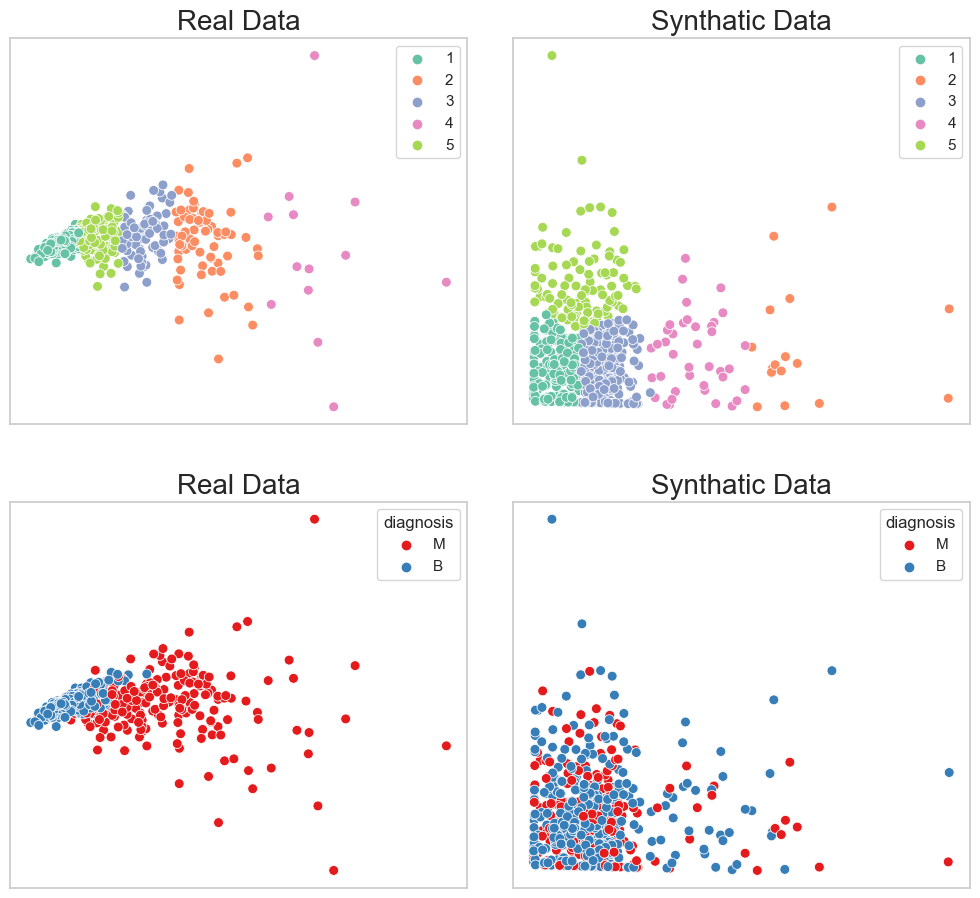

In [92]:
import low_dim_plots
reload(low_dim_plots)

from low_dim_plots import *

f = create_plots(pca_comps_or, pca_comps_sy, 
             k_clusters_or, k_clusters_sy, 
            output)

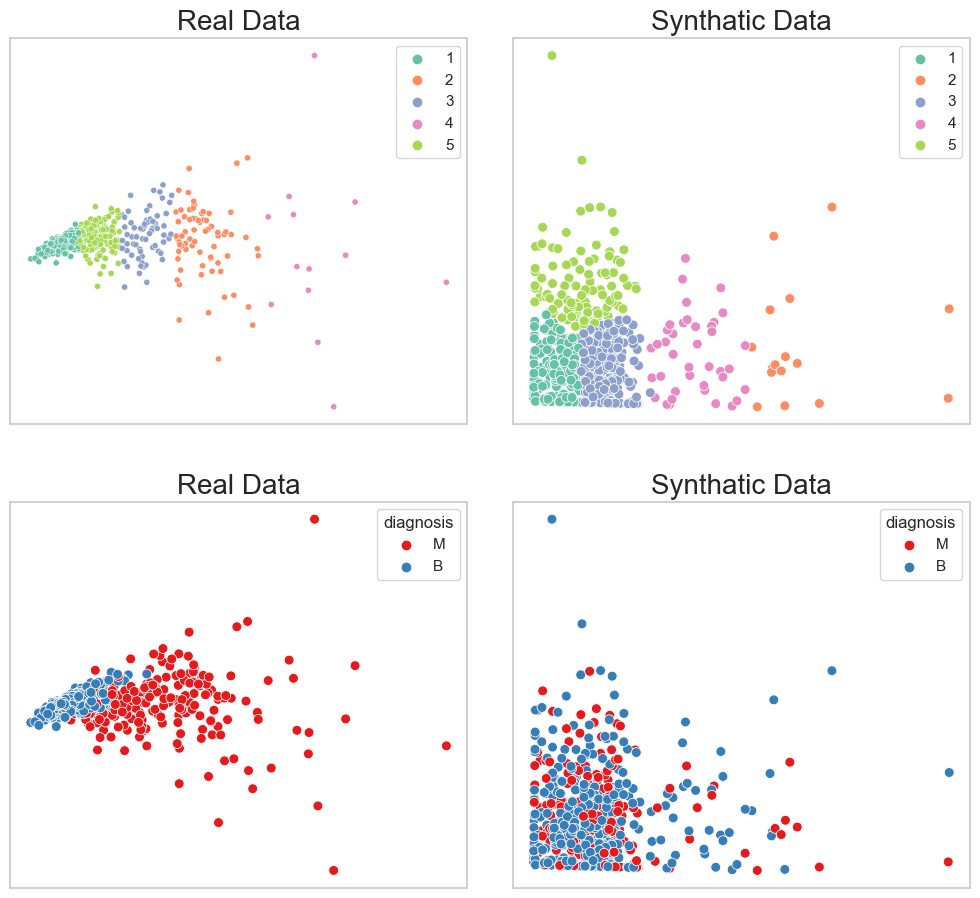

In [108]:
with sns.axes_style("whitegrid"):
    fig = plt.figure(figsize=(10, 10))
    fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)

    ax = fig.add_subplot(2, 2, 1)
    sns.scatterplot(x = pca_comps_or[:,0],
                    y = pca_comps_or[:,1],
                    ax = ax,
                    hue = k_clusters_or,
                    palette = "Set2",
                    s = 20)
    ax.set_title("Real Data", fontsize=20)
    ax.set(xticks=[], yticks=[])


    ax = fig.add_subplot(2, 2, 2)
    sns.scatterplot(x = pca_comps_sy[:,0],
                    y = pca_comps_sy[:,1],
                    ax = ax,
                    hue = k_clusters_sy,
                    palette = "Set2",
                    s = 50)
    ax.set_title("Synthatic Data", fontsize=20)
    ax.set(xticks=[], yticks=[])


    ax = fig.add_subplot(2, 2, 3)
    sns.scatterplot(x = pca_comps_or[:,0],
                    y = pca_comps_or[:,1],
                    ax = ax,
                    hue = output,
                    palette = "Set1",
                    s = 50)
    ax.set_title("Real Data", fontsize=20)
    ax.set(xticks=[], yticks=[])


    ax = fig.add_subplot(2, 2, 4)
    sns.scatterplot(x = pca_comps_sy[:,0],
                    y = pca_comps_sy[:,1],
                    ax = ax,
                    hue = output,
                    palette = "Set1",
                    s = 50)

    ax.set_title("Synthatic Data", fontsize=20)
    ax.set(xticks=[], yticks=[])


plt.subplots_adjust(wspace=0.10)
plt.subplots_adjust(hspace=0.20)
plt.show()
fig.savefig("../plots/data_low_dimensional.png")

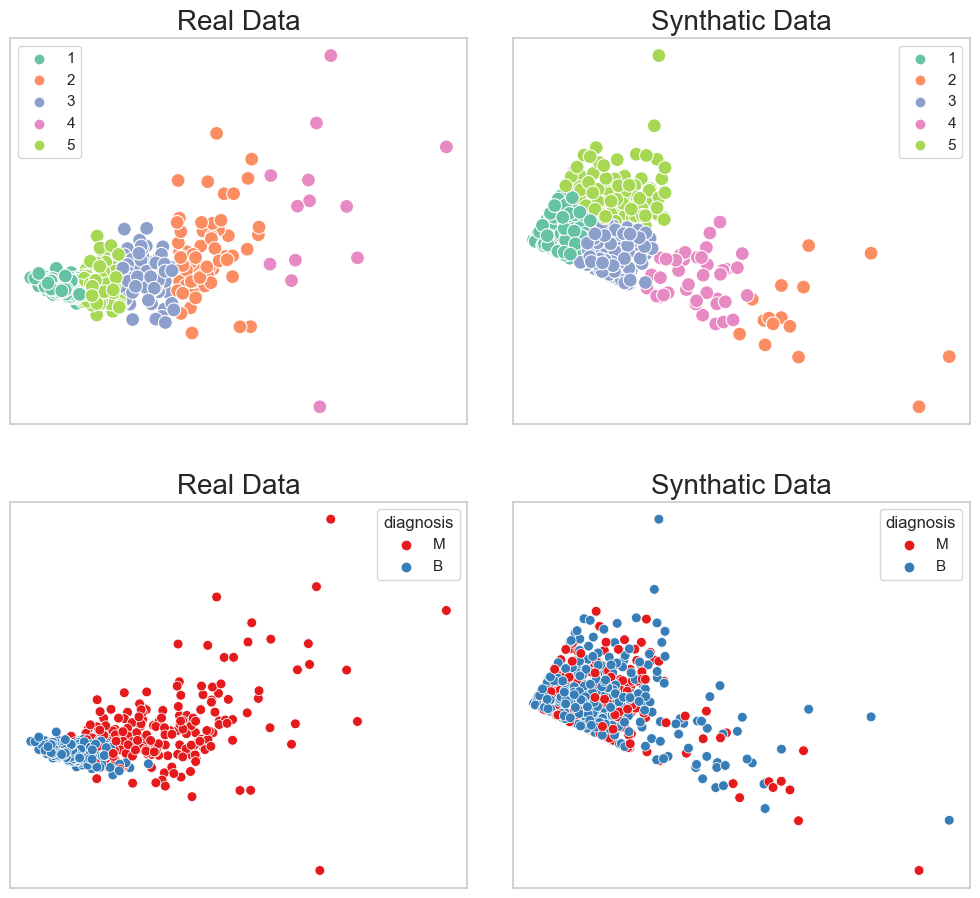

In [107]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)

ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x = svd_comps_or[:,0],
                y = svd_comps_or[:,1],
                ax = ax,
                hue = k_clusters_or,
                palette = "Set2",
                s = 100)
ax.set_title("Real Data", fontsize=20)
ax.set(xticks=[], yticks=[])


ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x = svd_comps_sy[:,0],
                y = svd_comps_sy[:,1],
                ax = ax,
                hue = k_clusters_sy,
                palette = "Set2",
                s = 100)
ax.set_title("Synthatic Data", fontsize=20)
ax.set(xticks=[], yticks=[])


ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x = svd_comps_or[:,0],
                y = svd_comps_or[:,1],
                ax = ax,
                hue = output,
                palette = "Set1",
                s = 50)
ax.set_title("Real Data", fontsize=20)
ax.set(xticks=[], yticks=[])


ax = fig.add_subplot(2, 2, 4)
sns.scatterplot(x = svd_comps_sy[:,0],
                y = svd_comps_sy[:,1],
                ax = ax,
                hue = output,
                palette = "Set1",
                s = 50)

ax.set_title("Synthatic Data", fontsize=20)
ax.set(xticks=[], yticks=[])


plt.subplots_adjust(wspace=0.10)
plt.subplots_adjust(hspace=0.20)
plt.show()
fig.savefig("../plots/data_low_dimensional.png")

In [95]:
lr = LogisticRegression(solver="liblinear",
                        max_iter=1000, penalty = "l1",
                        C = 0.05)
lr.fit(df_encoded_or, y=k_clusters_or)
support = np.transpose(lr.coef_ != 0)
score = lr.score(df_encoded_or, y=k_clusters_or)

print(score)

support_features = pd.Series(support.sum(axis=1), index=df_encoded_or.columns)
efective_support = support_features.loc[support_features > 0,]
efective_vars_or = efective_support.index.to_list()

efective_vars_or

0.8453427065026362


['perimeter_mean',
 'area_mean',
 'area_se',
 'texture_worst',
 'perimeter_worst',
 'area_worst']

In [96]:
lr = LogisticRegression(solver="liblinear",
                        max_iter=1000, penalty = "l1",
                        C = 0.05)
lr.fit(df_encoded_sy, y=k_clusters_sy)
support = np.transpose(lr.coef_ != 0)
score = lr.score(df_encoded_sy, y=k_clusters_sy)

print(score)

support_features = pd.Series(support.sum(axis=1), index=df_encoded_sy.columns)
efective_support = support_features.loc[support_features > 0,]
efective_vars_sy = efective_support.index.to_list()

efective_vars_sy

0.836555360281195


['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst']

In [97]:
lr = LogisticRegression(solver="liblinear",
                        max_iter=1000, penalty = "l1",
                        C = 0.05)
lr.fit(df_encoded_or, y=output)
support = np.transpose(lr.coef_ != 0)
score = lr.score(df_encoded_or, y=output)

print(score)

support_features = pd.Series(support.sum(axis=1), index=df_encoded_or.columns)
efective_support = support_features.loc[support_features > 0,]
efective_vars_or = efective_support.index.to_list()

efective_vars_or

0.9349736379613357


['perimeter_mean',
 'area_mean',
 'area_se',
 'texture_worst',
 'perimeter_worst',
 'area_worst']

In [98]:
lr = LogisticRegression(solver="liblinear",
                        max_iter=1000, penalty = "l1",
                        C = 0.05)
lr.fit(df_encoded_sy, y=output)
support = np.transpose(lr.coef_ != 0)
score = lr.score(df_encoded_sy, y=output)

print(score)

support_features = pd.Series(support.sum(axis=1), index=df_encoded_sy.columns)
efective_support = support_features.loc[support_features > 0,]
efective_vars_sy = efective_support.index.to_list()

efective_vars_sy

0.6274165202108963


['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'area_se',
 'texture_worst',
 'perimeter_worst',
 'area_worst']

<AxesSubplot: >

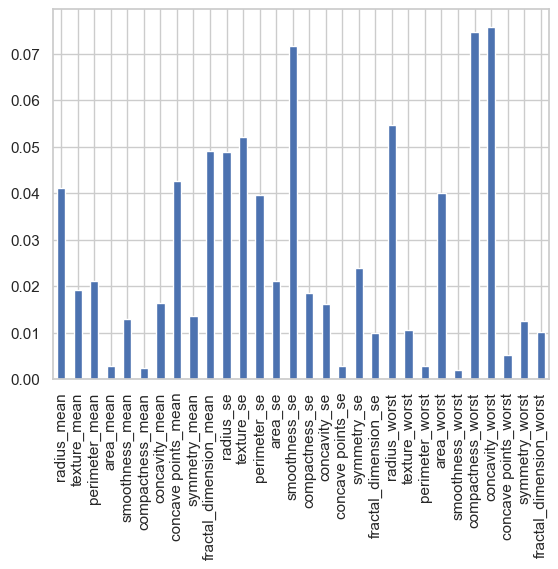

In [99]:
corr = df_encoded_or.corrwith(df_encoded_sy).abs()
corr.plot.bar()

In [100]:
Working with the random forest models: 

SyntaxError: invalid syntax (1189272703.py, line 1)

In [104]:
def plot_random_forest_single_df(df, labeles, ax):
    rf = RandomForestClassifier()
    rf.fit(df, y=labeles)
    support = np.transpose(lr.coef_ != 0)
    score = rf.score(df, y=labeles)

    support_features = pd.Series(rf.feature_importances_, index=df.columns)
    support_features = support_features.sort_values(ascending=False)

    support_features_top = support_features.head(20)

    sns.barplot(x = support_features_top.values,
                y = support_features_top.index,
                ax = ax)

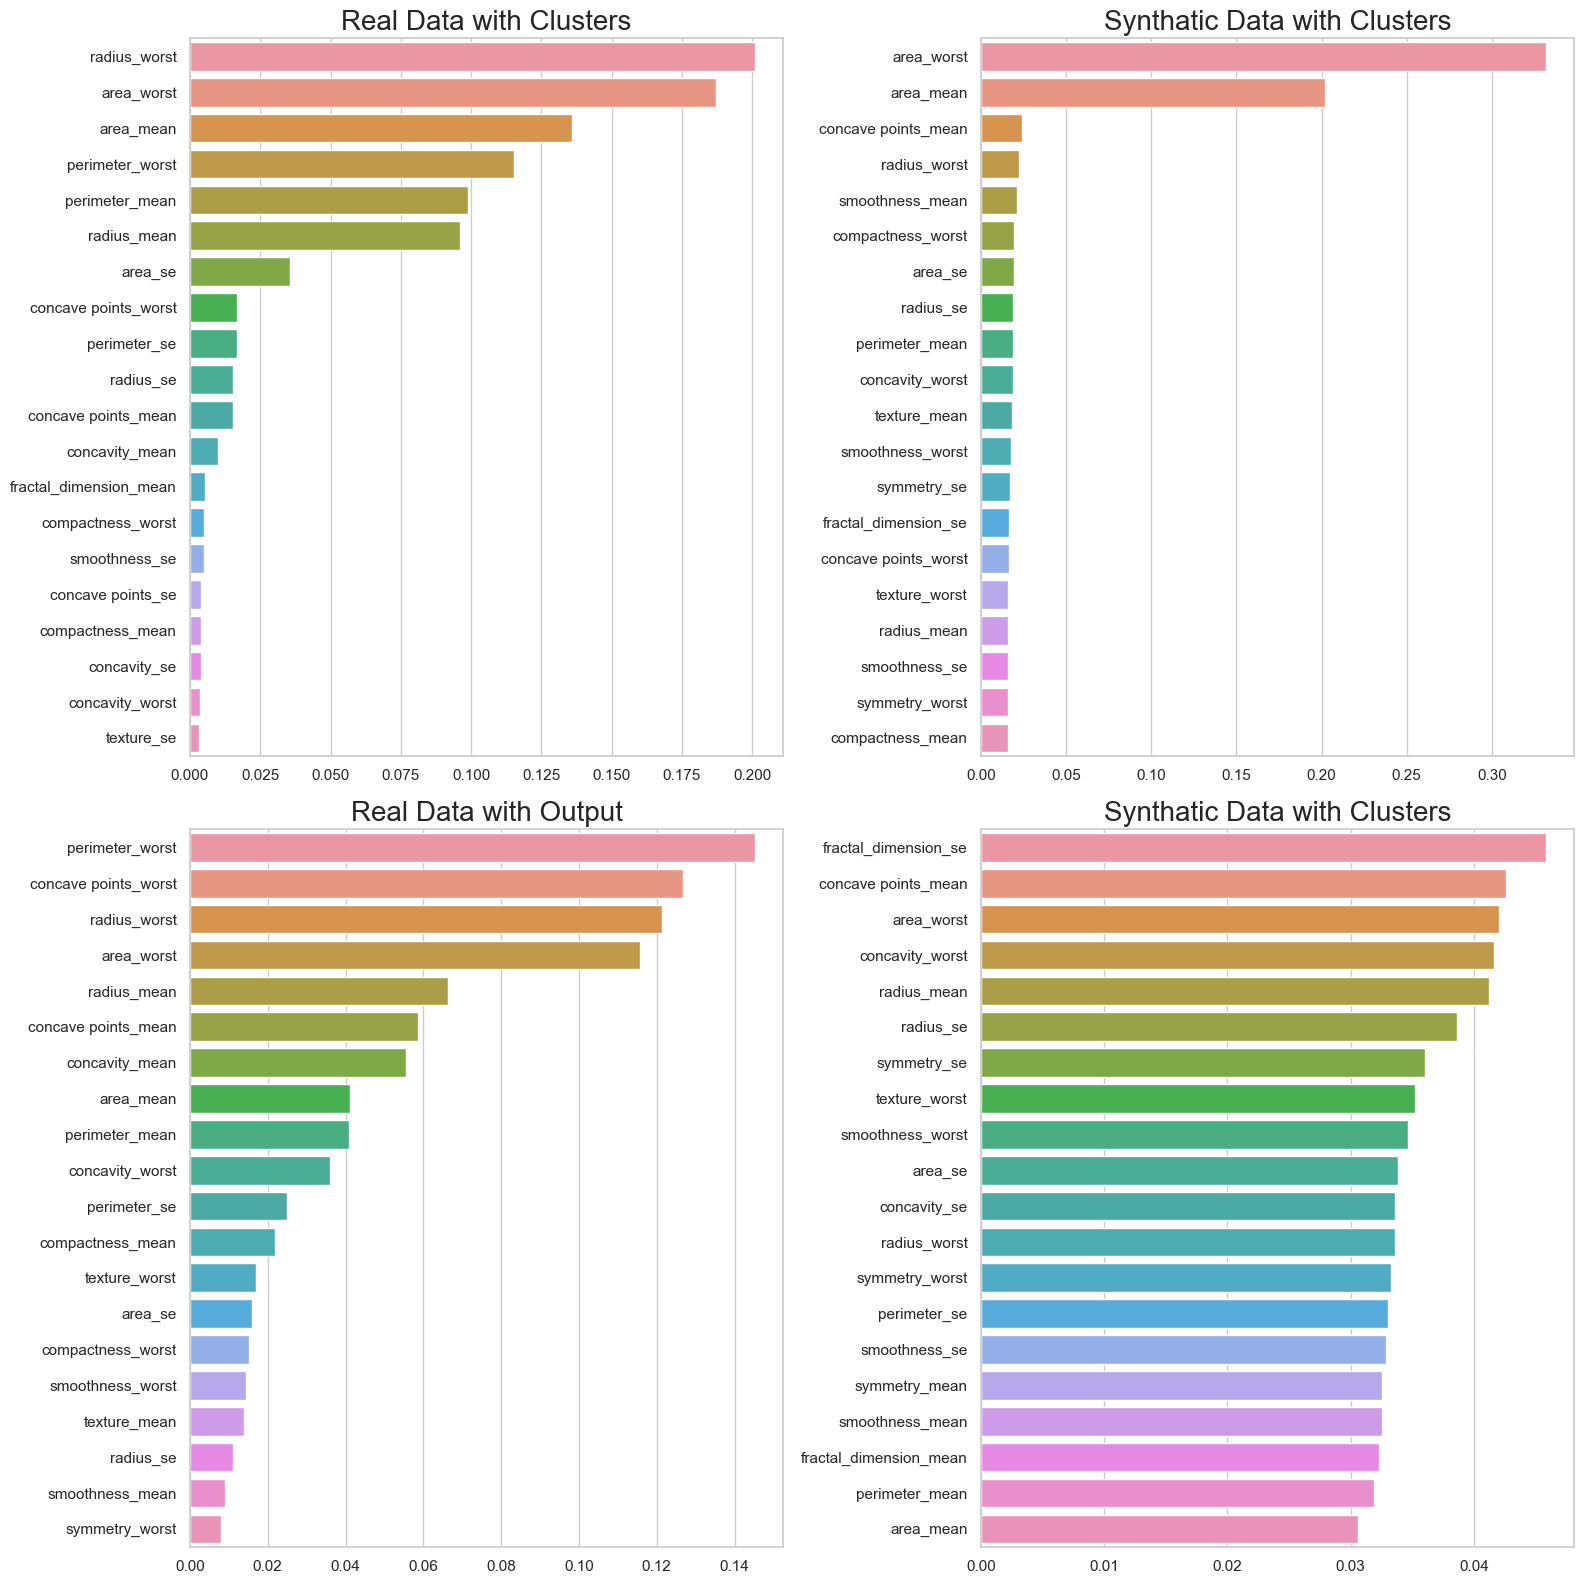

In [105]:
def plot_random_forest(df_or, df_sy, label_or, label_sy, output):
    nrows = 2
    ncols = 2
    if output is None:
        nrows = 1
    fig = plt.figure(figsize=(16, 16))
    fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
    
    ax = fig.add_subplot(nrows, ncols, 1)
    plot_random_forest_single_df(df_encoded_or, k_clusters_or, ax)
    ax.set_title("Real Data with Clusters", fontsize=20)
    
    ax = fig.add_subplot(nrows, ncols, 2)
    plot_random_forest_single_df(df_encoded_sy, k_clusters_sy, ax)
    ax.set_title("Synthatic Data with Clusters", fontsize=20)
    
    if output is not None:
        ax = fig.add_subplot(nrows, ncols, 3)
        plot_random_forest_single_df(df_encoded_or, output, ax)
        ax.set_title("Real Data with Output", fontsize=20)
        
        ax = fig.add_subplot(nrows, ncols, 4)
        plot_random_forest_single_df(df_encoded_sy, output, ax)
        ax.set_title("Synthatic Data with Clusters", fontsize=20)
    
    
    plt.subplots_adjust(wspace=1.0)
    plt.subplots_adjust(hspace=0.20)
    plt.tight_layout()

plot_random_forest(df_encoded_or, df_encoded_sy, 
                       k_clusters_or, k_clusters_or, output)

plt.show()